# Exploración Aquí:

Análisis De Datos Exploratorios:

In [59]:
# - Importación de librerías:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math

# - Importación del set de datos:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=',')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [61]:
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [62]:
numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'
]

categoricas = [
    'STATE_NAME',
    'COUNTY_NAME',
    'Urban_rural_code'
]

objetivo = 'anycondition_prevalence'

conservar = numericas + categoricas + [objetivo]

df = df[[col for col in conservar if col in df.columns]]

df

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),STATE_NAME,COUNTY_NAME,Urban_rural_code,anycondition_prevalence
0,35.8,12.9,7.9,3.1,8.6,11.3,3.6,59338,20181,196.7,Alabama,Autauga,3,47.6
1,29.7,12.0,7.8,3.2,8.6,9.7,3.6,57588,68790,196.7,Alabama,Baldwin,4,40.2
2,40.7,19.7,11.0,4.5,12.1,27.0,5.2,34382,11325,196.7,Alabama,Barbour,6,57.5
3,38.7,14.1,8.6,3.3,10.0,16.8,4.0,46064,9190,196.7,Alabama,Bibb,2,51.6
4,34.0,13.5,9.2,3.4,10.5,19.8,3.5,50412,20584,196.7,Alabama,Blount,2,46.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,33.6,8.9,5.9,2.6,6.6,9.0,4.2,73315,12796,199.6,Wyoming,Sweetwater,5,40.3
3136,19.4,7.2,5.2,2.4,4.9,5.6,3.0,99087,4576,199.6,Wyoming,Teton,5,24.3
3137,34.2,10.4,7.2,3.0,8.0,7.2,4.4,63401,6101,199.6,Wyoming,Uinta,5,42.2
3138,28.4,11.3,8.2,3.4,8.3,10.4,4.2,55190,2285,199.6,Wyoming,Washakie,6,37.5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 14 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Obesity_prevalence                                                      3140 non-null   float64
 1   diabetes_prevalence                                                     3140 non-null   float64
 2   Heart disease_prevalence                                                3140 non-null   float64
 3   CKD_prevalence                                                          3140 non-null   float64
 4   COPD_prevalence                                                         3140 non-null   float64
 5   Percent of adults with less than a high school diploma 2014-18          3140 non-null   float64
 6   Unemployment_rate_2018                                                  3140 non

In [64]:
df.describe()

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Urban_rural_code,anycondition_prevalence
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000
mean,35.019299,13.073503,8.607803,3.446242,9.095223,13.410287,4.131338,52767.083758,3.338540e+04,226.159013,4.635350,46.793917
std,4.517088,2.724351,1.758587,0.568059,2.344965,6.337847,1.503013,13907.992668,9.888669e+04,31.542980,1.510447,6.379448
min,15.200000,6.100000,3.500000,1.800000,3.500000,1.200000,0.000000,0.000000,4.100000e+01,174.800000,1.000000,22.000000
25%,32.400000,11.200000,7.400000,3.100000,7.300000,8.800000,3.100000,43677.000000,4.215000e+03,202.900000,3.000000,42.900000
50%,35.400000,12.800000,8.600000,3.400000,8.900000,12.100000,3.900000,50564.500000,9.753000e+03,223.500000,5.000000,47.200000
75%,37.900000,14.800000,9.800000,3.800000,10.600000,17.200000,4.800000,58822.250000,2.500125e+04,240.700000,6.000000,51.000000
max,49.900000,25.600000,15.100000,6.200000,19.900000,66.300000,19.900000,140382.000000,2.877316e+06,619.000000,6.000000,66.200000


In [65]:
df.isnull().sum()

Obesity_prevalence                                                        0
diabetes_prevalence                                                       0
Heart disease_prevalence                                                  0
CKD_prevalence                                                            0
COPD_prevalence                                                           0
Percent of adults with less than a high school diploma 2014-18            0
Unemployment_rate_2018                                                    0
Median_Household_Income_2018                                              0
anycondition_number                                                       0
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)    0
STATE_NAME                                                                0
COUNTY_NAME                                                               0
Urban_rural_code                                                          0
anycondition

In [66]:
df.duplicated().sum()

np.int64(0)

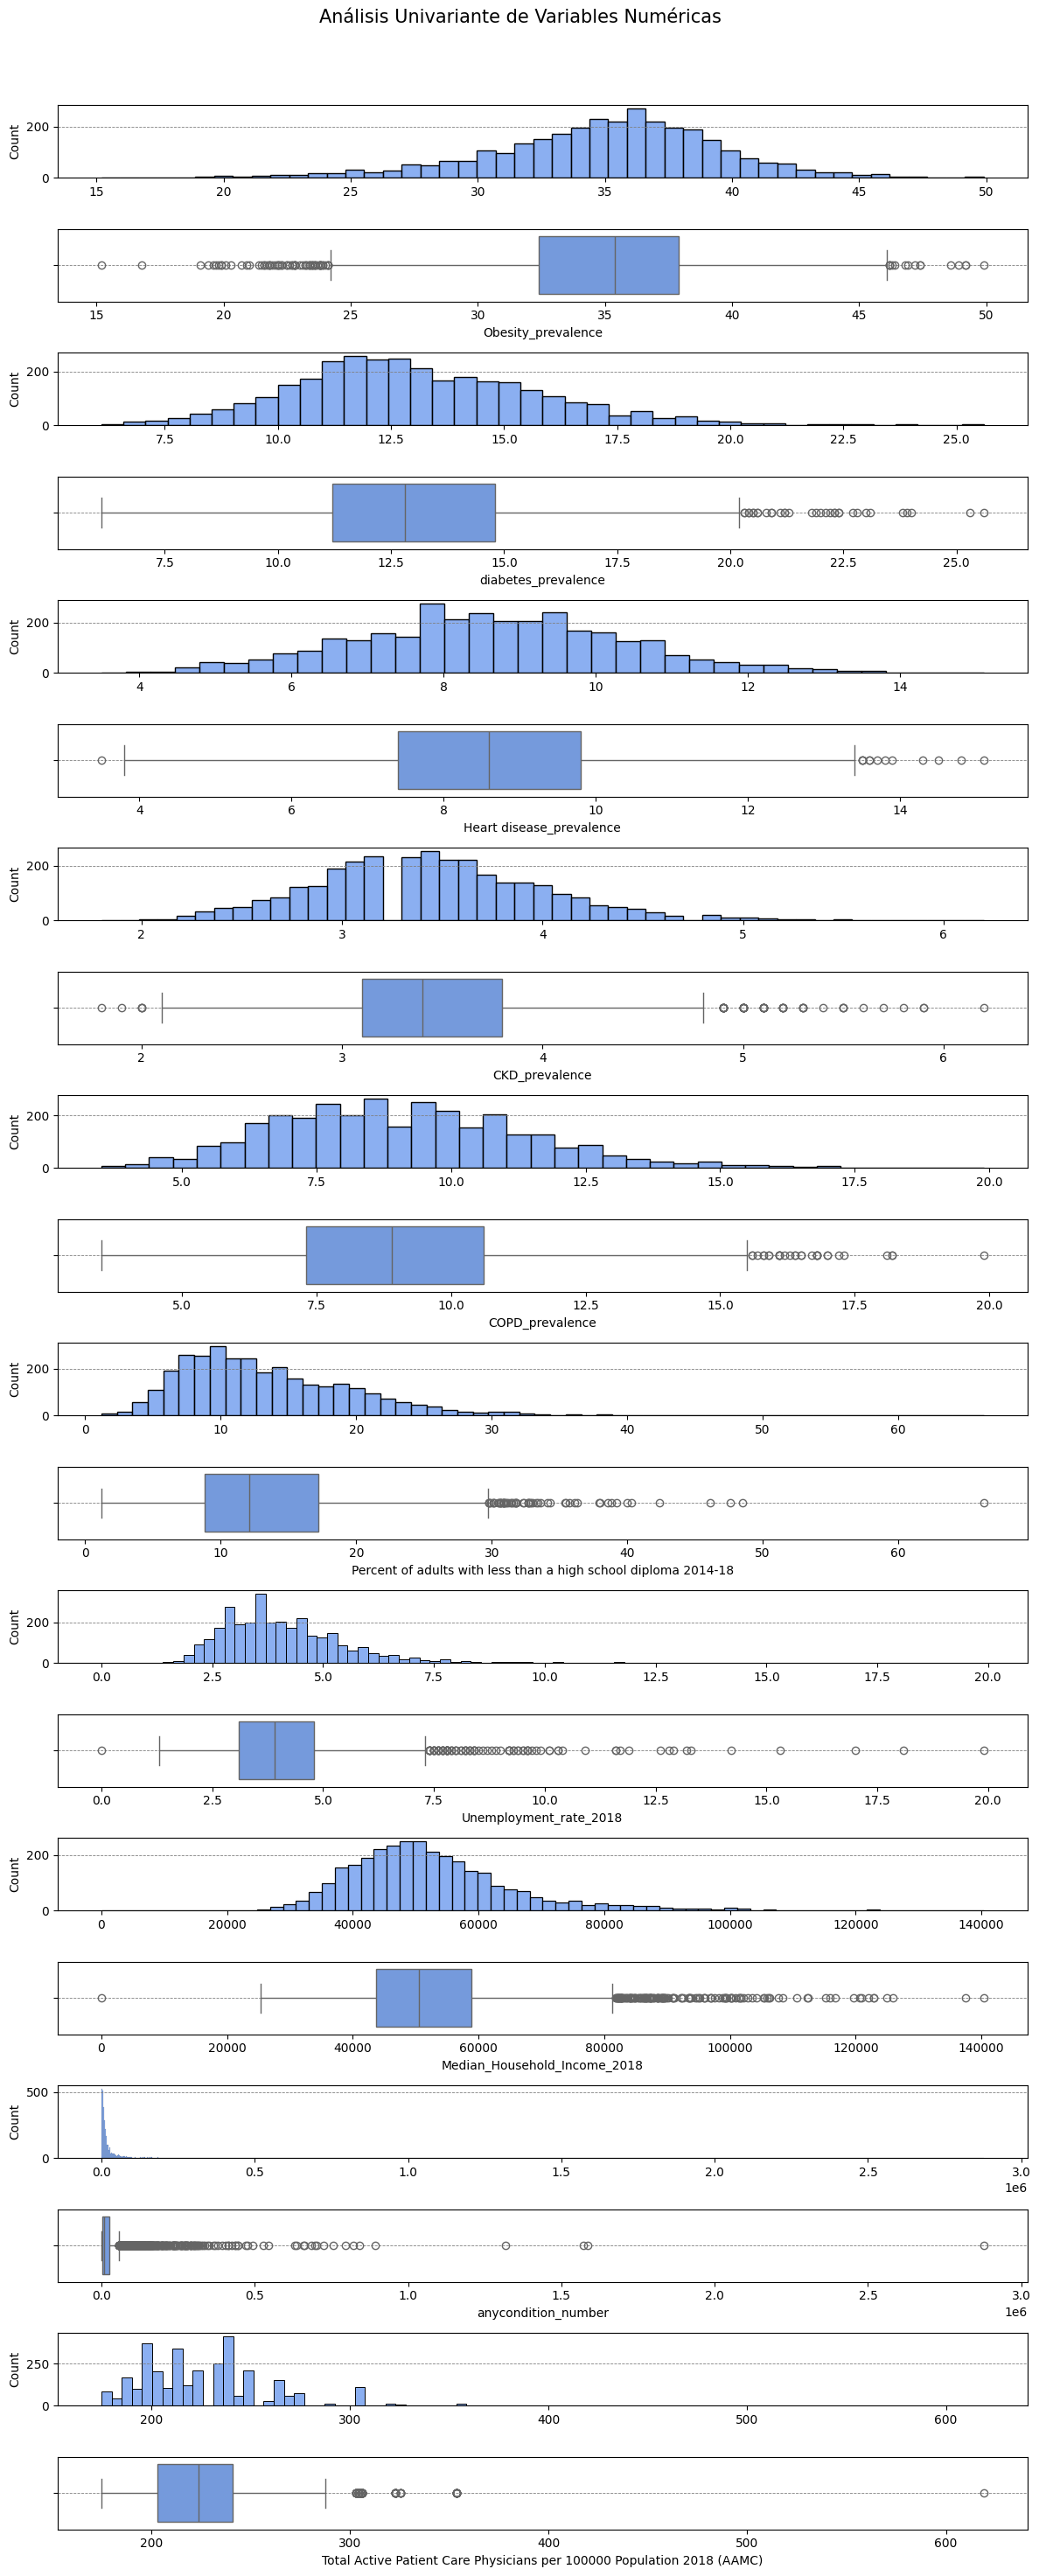

In [67]:
# - Variables Numéricas:

numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'
]

# - Parámetros:

fig, axis = plt.subplots(len(numericas) * 2, 1, figsize=(12, len(numericas) * 3))
fig.suptitle("Análisis Univariante de Variables Numéricas", fontsize=15)
color = "cornflowerblue"

# - Distribuciones:

for i, var in enumerate(numericas):
    if var in df.columns:
        sns.histplot(ax=axis[2 * i], data=df, x=var, color=color).set(xlabel=None)
        sns.boxplot(ax=axis[2 * i + 1], data=df, x=var, color=color)

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.96])
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.6)
plt.show()

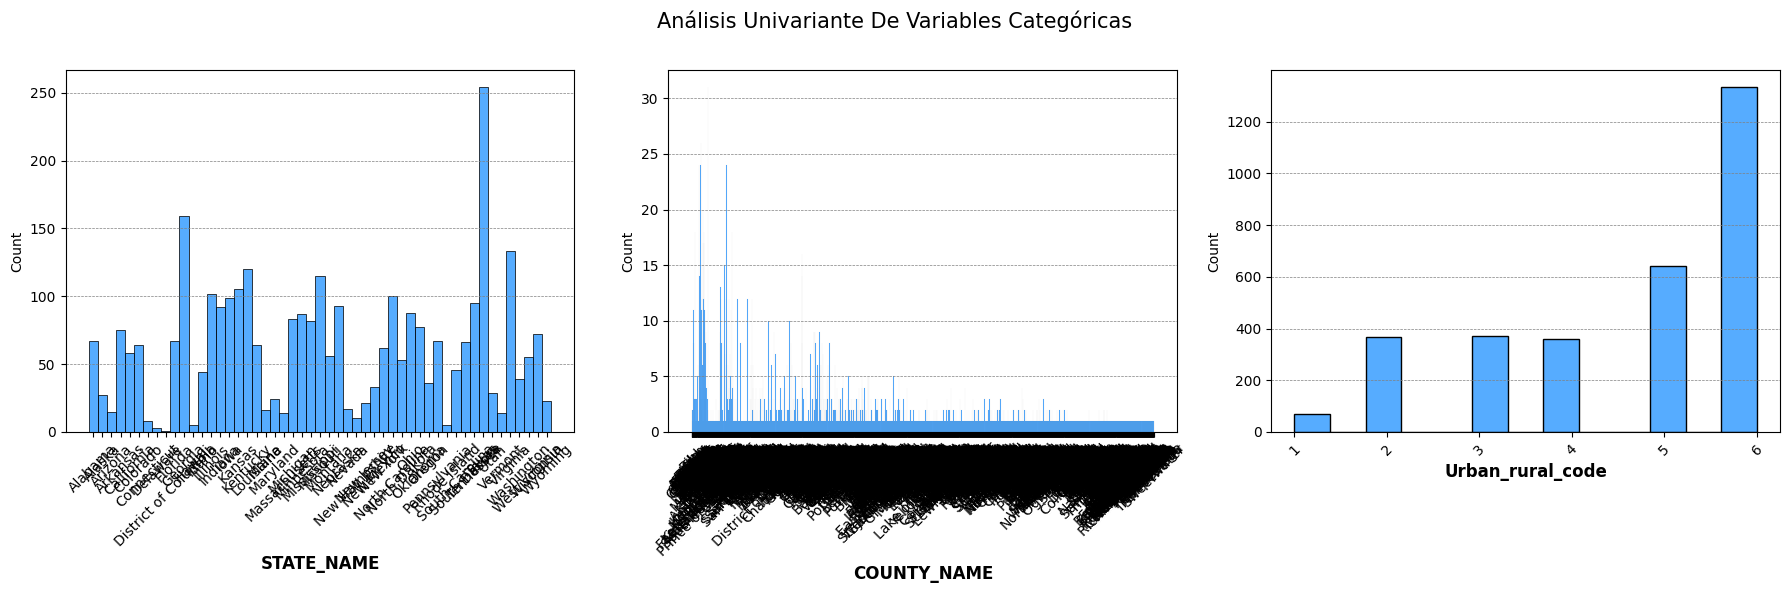

In [68]:
# - Variables Categóricas:

categoricas = [
    'STATE_NAME',
    'COUNTY_NAME',
    'Urban_rural_code'
]

# - Parámetros:

fig, axis = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Análisis Univariante De Variables Categóricas", fontsize=15)
color = 'dodgerblue'

# - Distribución:

for i, var in enumerate(categoricas):
    sns.histplot(ax=axis[i], data=df, x=var, color=color)
    axis[i].set_xlabel(var, fontsize=12, fontweight='bold')
    axis[i].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
    x_labels = axis[i].get_xticklabels()
    if len(x_labels) > 3:
        for label in x_labels:
            label.set_rotation(45)

# - Visualización:

plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4)
plt.show()

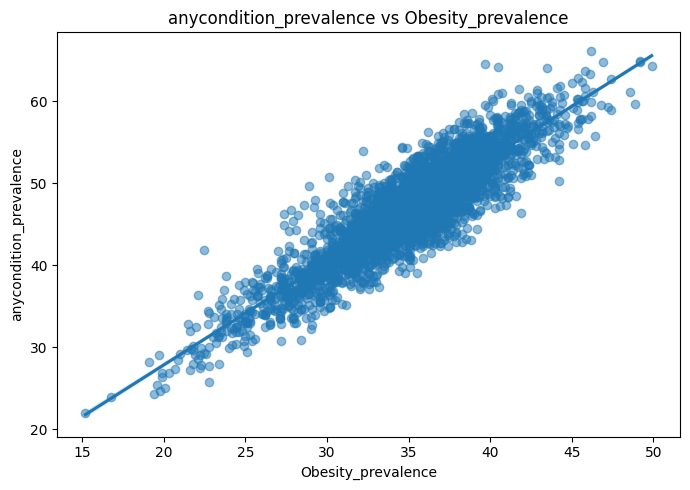

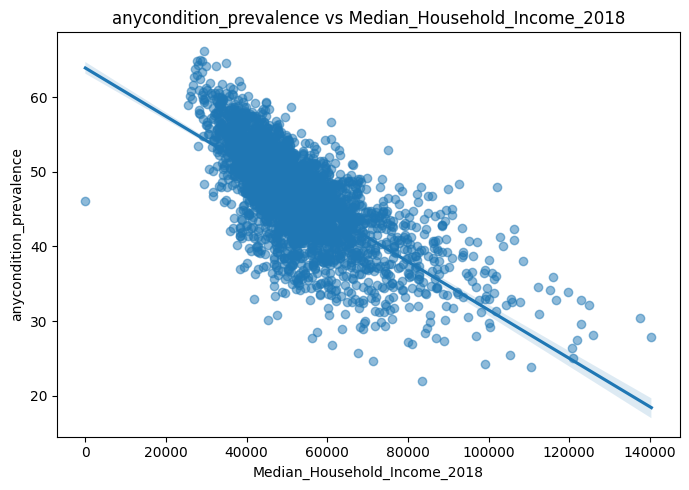

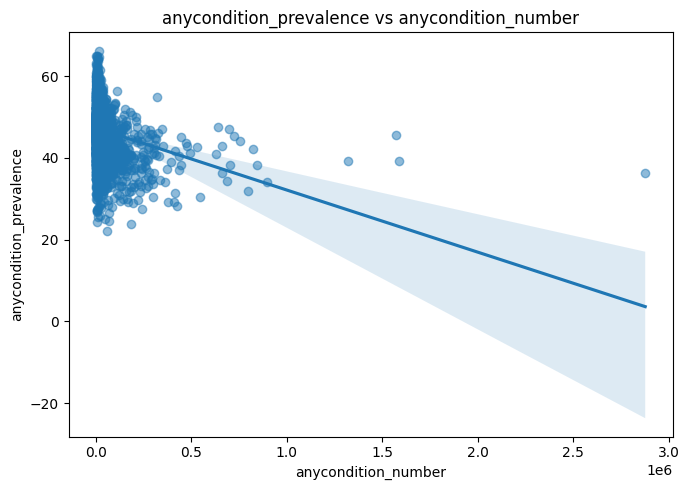

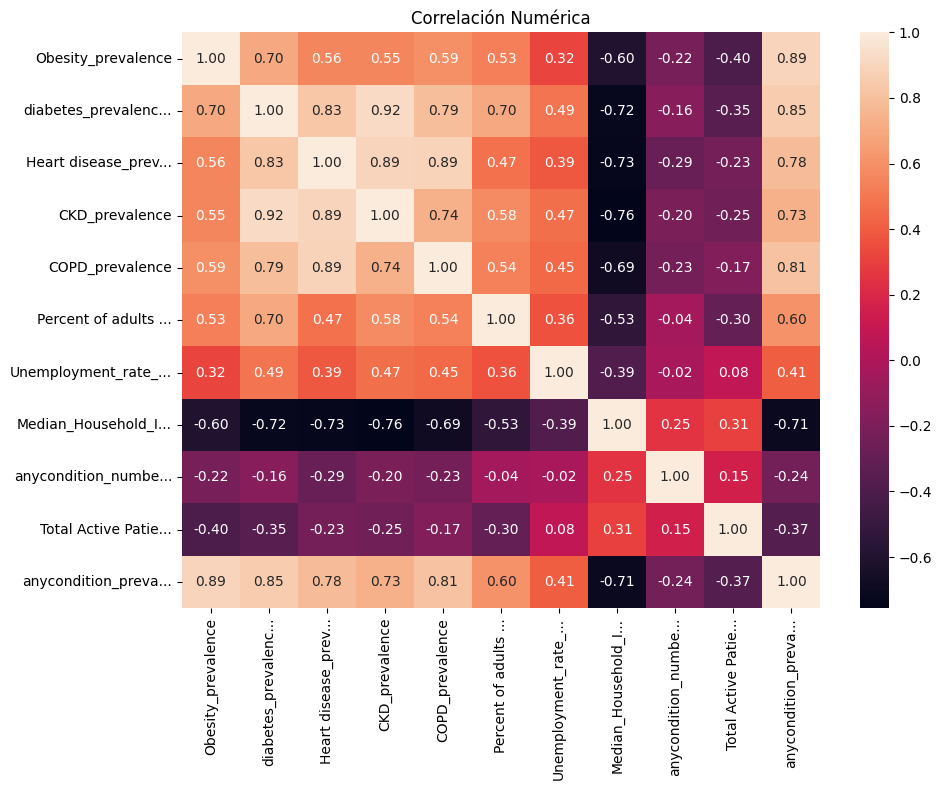

In [69]:
# - Distribución:

plt.figure(figsize=(7, 5))
sns.regplot(data=df, x="Obesity_prevalence", y="anycondition_prevalence", scatter_kws={'alpha': 0.5})
plt.title("anycondition_prevalence vs Obesity_prevalence")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.regplot(data=df, x="Median_Household_Income_2018", y="anycondition_prevalence", scatter_kws={'alpha': 0.5})
plt.title("anycondition_prevalence vs Median_Household_Income_2018")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.regplot(data=df, x="anycondition_number", y="anycondition_prevalence", scatter_kws={'alpha': 0.5})
plt.title("anycondition_prevalence vs anycondition_number")
plt.tight_layout()
plt.show()

# - Mapa De Calor:

numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'anycondition_prevalence'
]

col_renames = {
    col: col[:18] + '...' if len(col) > 18 else col
    for col in numericas
}

df_temp = df[numericas].rename(columns=col_renames)

plt.figure(figsize=(10, 8))
sns.heatmap(df_temp.corr(), annot=True, fmt=".2f")
plt.title("Correlación Numérica")
plt.tight_layout()
plt.show()


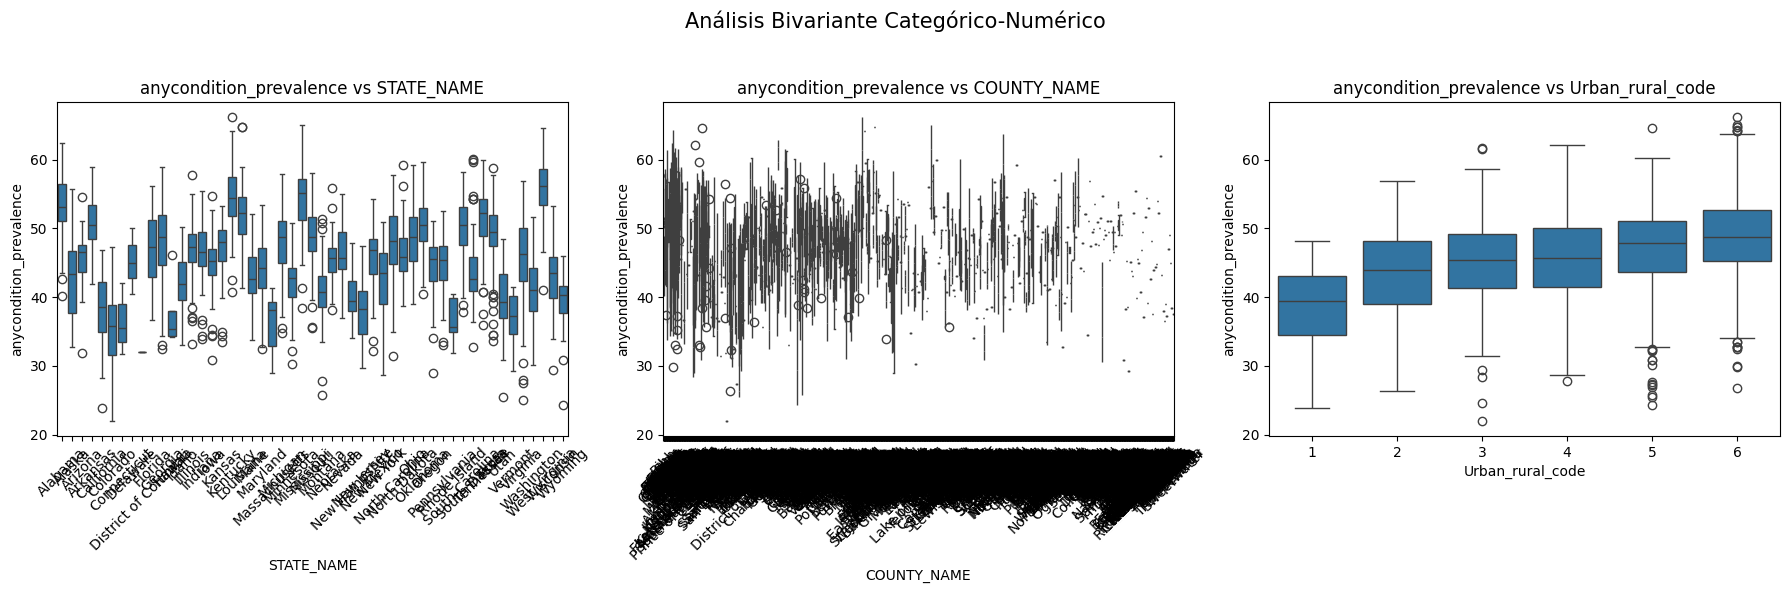

In [70]:
# - Parámetros:

fig, axis = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Análisis Bivariante Categórico-Numérico", fontsize=15)

# - Gráficos:

sns.boxplot(ax=axis[0], data=df, x="STATE_NAME", y="anycondition_prevalence")
axis[0].set_title("anycondition_prevalence vs STATE_NAME")
axis[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axis[1], data=df, x="COUNTY_NAME", y="anycondition_prevalence")
axis[1].set_title("anycondition_prevalence vs COUNTY_NAME")
axis[1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axis[2], data=df, x="Urban_rural_code", y="anycondition_prevalence")
axis[2].set_title("anycondition_prevalence vs Urban_rural_code")

# - Visualización:

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

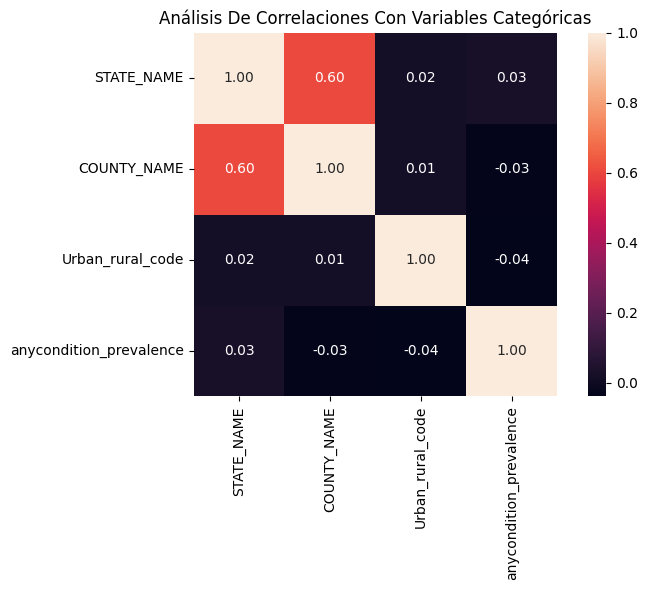

In [71]:
# - Factorización:

df = df.copy()
df["STATE_NAME"] = pd.factorize(df["STATE_NAME"])[0]
df["COUNTY_NAME"] = pd.factorize(df["COUNTY_NAME"])[0]
df["Urban_rural_code"] = pd.factorize(df["Urban_rural_code"])[0]

# - Análisis De Correlación:

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df[["STATE_NAME", "COUNTY_NAME", "Urban_rural_code", "anycondition_prevalence"]].corr(),
    annot=True, fmt=".2f", square=True
)

# - Visualización:

plt.title("Análisis De Correlaciones Con Variables Categóricas")
plt.tight_layout()
plt.show()

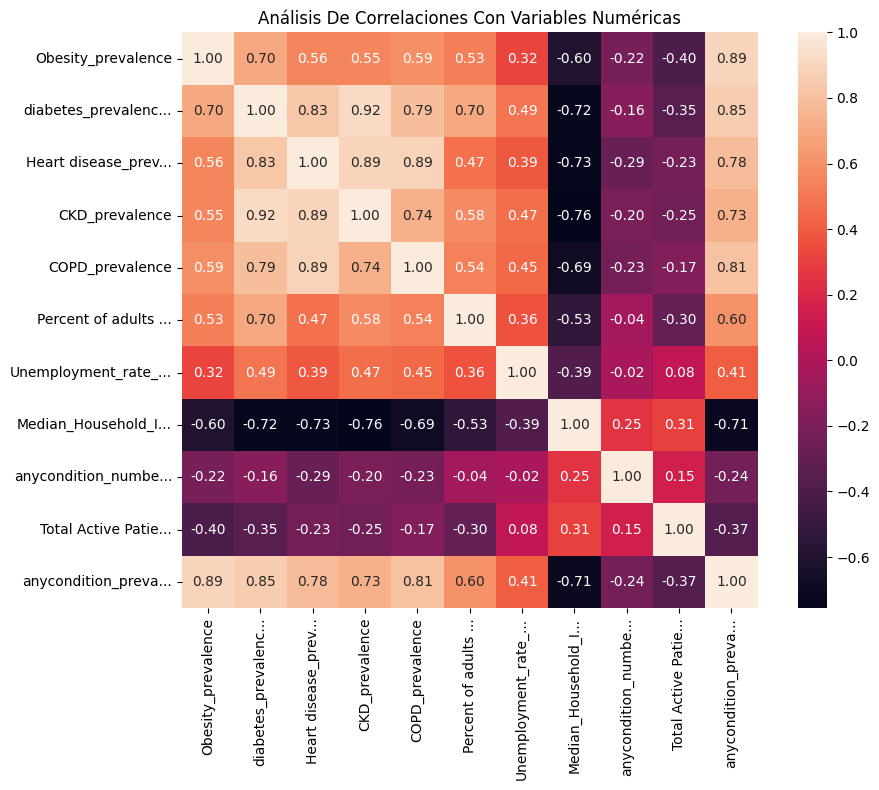

In [72]:
numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'anycondition_prevalence'
]

# - Abreviación:

col_renames = {
    col: col[:18] + '...' if len(col) > 18 else col
    for col in numericas
}

df_temp = df[numericas].rename(columns=col_renames)

# - Mapa De Calor:

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_temp.corr(), annot=True, fmt=".2f", square=True)

# - Visualización:

plt.title("Análisis De Correlaciones Con Variables Numéricas")
plt.tight_layout()
plt.show()


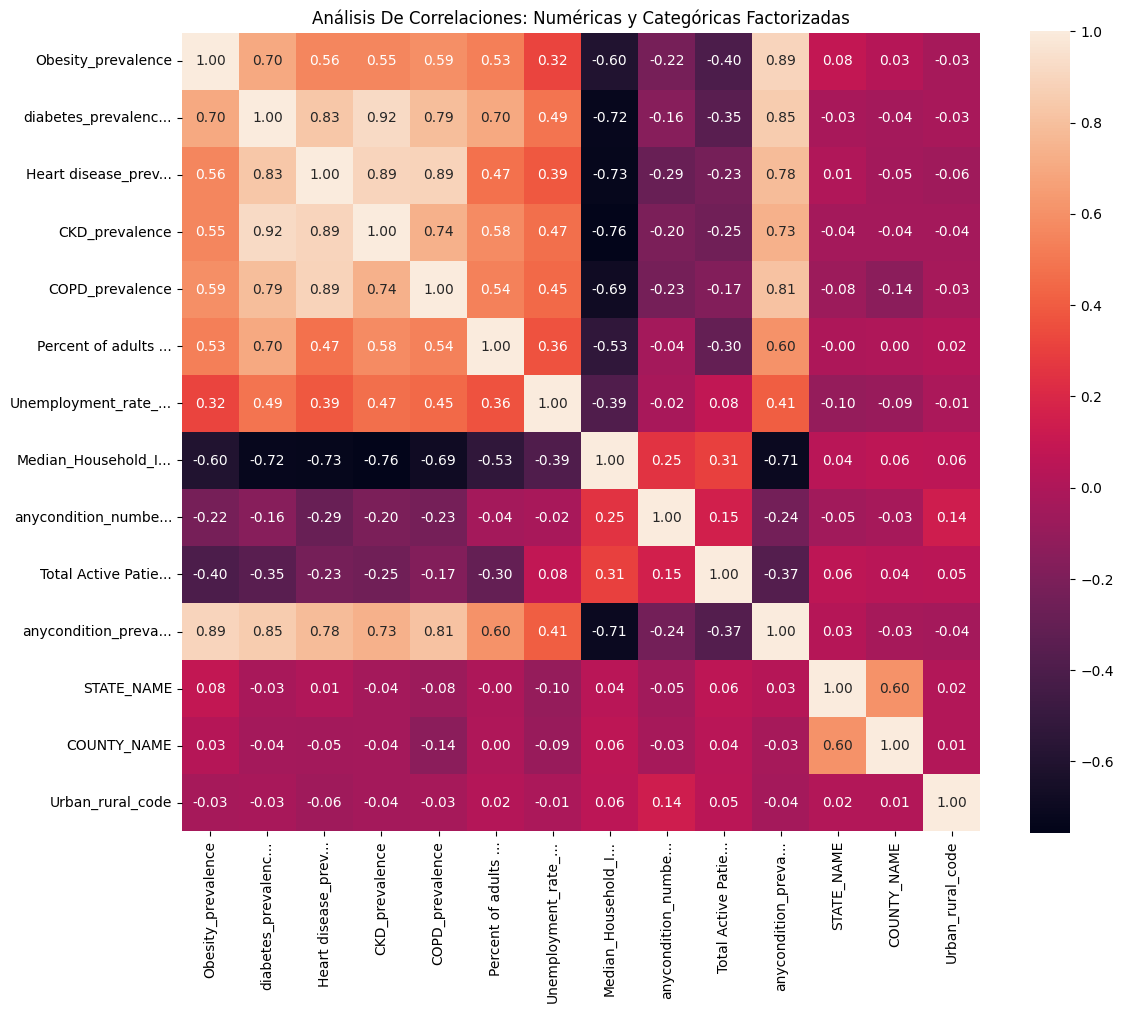

In [73]:
categoricas = ['STATE_NAME', 'COUNTY_NAME', 'Urban_rural_code']
numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'anycondition_prevalence'
]
variables_corr = numericas + categoricas

# - Abreviación:

col_renames = {
    col: col[:18] + '...' if len(col) > 18 else col
    for col in variables_corr
}
df_temp = df[variables_corr].rename(columns=col_renames)

# - Mapa De Calor:

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_temp.corr(), annot=True, fmt=".2f", square=True, ax=ax)

# - Visualización:

plt.title("Análisis De Correlaciones: Numéricas y Categóricas Factorizadas")
plt.tight_layout()
plt.show()

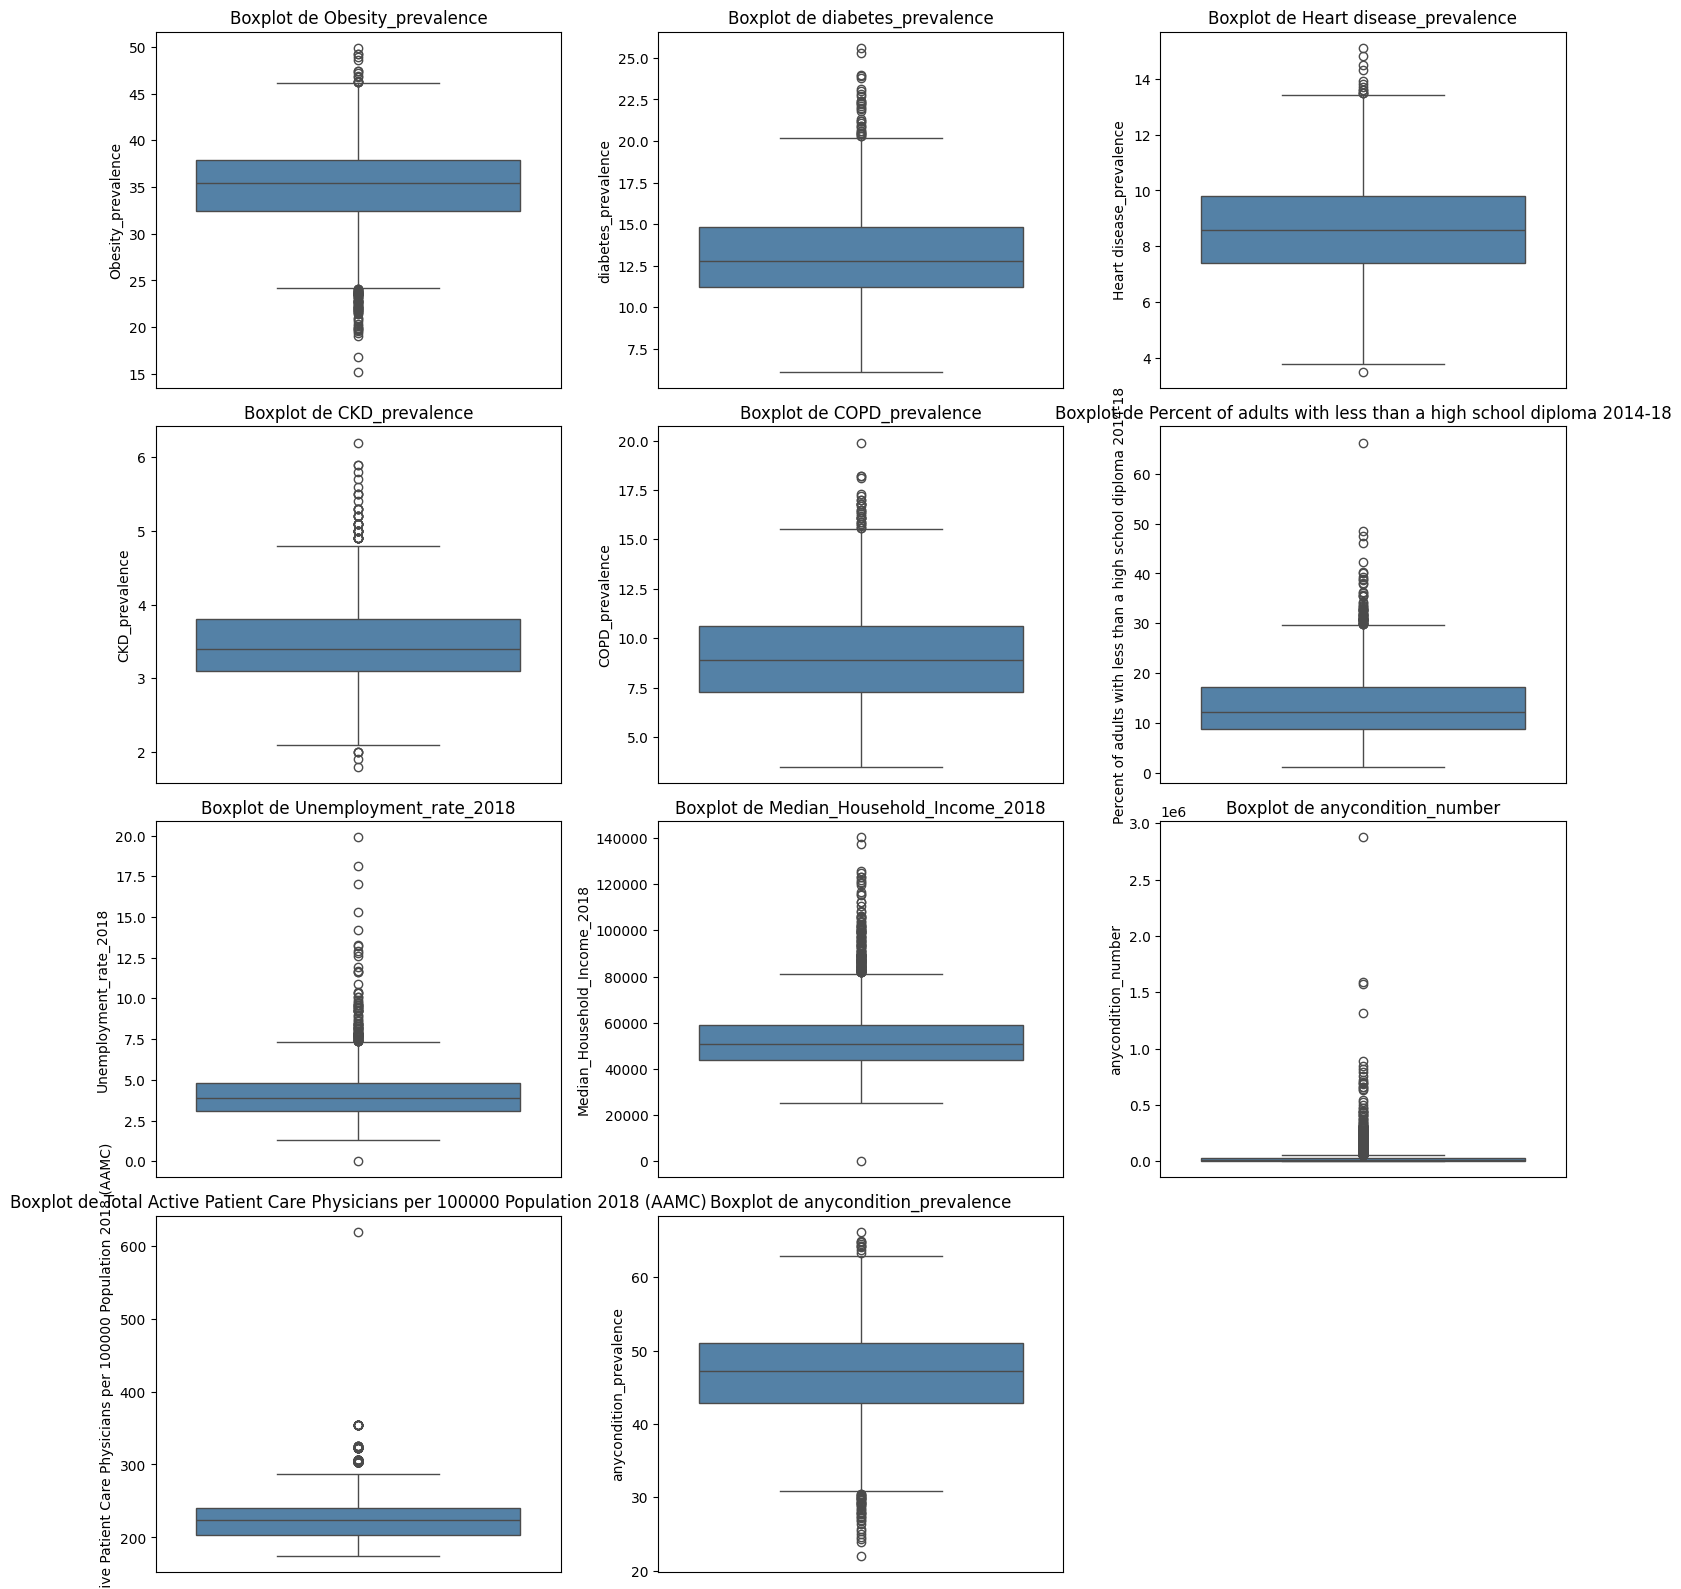

In [74]:
# - Parámetros:

numericas = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    'COPD_prevalence',
    'Percent of adults with less than a high school diploma 2014-18',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'anycondition_number',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'anycondition_prevalence'
]

cols = 3
rows = math.ceil(len(numericas) / cols)
fig, axis = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axis = axis.flatten()

# - Distribución:

for idx, var in enumerate(numericas):
    sns.boxplot(ax=axis[idx], data=df, y=var, color="steelblue")
    axis[idx].set_title(f"Boxplot de {var}", fontsize=12)
    axis[idx].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

for j in range(idx + 1, len(axis)):
    fig.delaxes(axis[j])

# - Visualización:

plt.tight_layout()
plt.show()

In [75]:
# - Importación De Librerías:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# - Declaración De Variables:

X = df.drop('anycondition_prevalence', axis=1)
y = df['anycondition_prevalence']

# - División:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# - Escalado:

scaler = MinMaxScaler()
scaler.fit(X_train)

# - Transformación:

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=X_test.columns)

In [76]:
# - Importación De Librerías:

from sklearn.feature_selection import f_regression, SelectKBest  # f_regression ya que "charges" es numérica

# - Selección De Características:

selection_model = SelectKBest(score_func=f_regression, k=5)
selection_model.fit(X_train_scal, y_train)

# - Selección De Variables:

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns=X_train_scal.columns.values[ix], index=X_train_scal.index)

X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns=X_test_scal.columns.values[ix], index=X_test_scal.index)

In [77]:
X_train_scal

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),STATE_NAME,COUNTY_NAME,Urban_rural_code
1292,0.674352,0.395833,0.557522,0.441860,0.475610,0.272727,0.429577,0.358835,0.003535,0.168618,0.44,0.477693,0.4
2302,0.518732,0.364583,0.477876,0.372093,0.390244,0.190275,0.345070,0.325975,0.006687,0.221747,0.76,0.763330,0.8
761,0.533141,0.317708,0.309735,0.232558,0.347561,0.202960,0.267606,0.389779,0.004950,0.083746,0.28,0.177367,0.6
2194,0.613833,0.265625,0.353982,0.255814,0.280488,0.141649,0.232394,0.440576,0.011475,0.032193,0.72,0.733950,0.0
1241,0.642651,0.333333,0.407080,0.348837,0.371951,0.162791,0.295775,0.344866,0.017278,0.168618,0.44,0.003264,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.501441,0.098958,0.176991,0.139535,0.134146,0.084567,0.225352,0.537255,0.004410,0.142954,0.98,0.224157,0.6
1095,0.634006,0.260417,0.274336,0.162791,0.317073,0.177590,0.232394,0.523571,0.007132,0.089599,0.34,0.083787,0.0
1130,0.685879,0.515625,0.548673,0.488372,0.542683,0.509514,0.408451,0.243001,0.004596,0.128321,0.36,0.414581,0.4
1294,0.608069,0.520833,0.814159,0.604651,0.585366,0.131078,0.549296,0.290621,0.000910,0.168618,0.44,0.478781,0.4


In [78]:
X_test_scal

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),STATE_NAME,COUNTY_NAME,Urban_rural_code
2893,0.628242,0.453125,0.486726,0.465116,0.384146,0.346723,0.218310,0.351890,0.001196,0.128321,0.92,0.936344,0.4
2968,0.417867,0.208333,0.238938,0.209302,0.152439,0.093023,0.323944,0.545155,0.029710,0.160964,0.94,0.959195,0.0
1064,0.815562,0.677083,0.814159,0.581395,0.810976,0.511628,0.443662,0.213909,0.003022,0.089599,0.34,0.394995,0.4
1231,0.443804,0.234375,0.336283,0.255814,0.335366,0.171247,0.232394,0.443412,0.012801,0.168618,0.44,0.452666,0.8
2987,0.285303,0.166667,0.212389,0.209302,0.158537,0.137421,0.330986,0.443518,0.020906,0.160964,0.94,0.965724,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0.518732,0.187500,0.247788,0.209302,0.128049,0.126850,0.288732,0.479185,0.003086,0.203062,0.46,0.499456,0.6
670,0.504323,0.276042,0.389381,0.302326,0.329268,0.137421,0.366197,0.472418,0.000709,0.147906,0.26,0.177367,0.8
2283,0.631124,0.317708,0.415929,0.325581,0.359756,0.162791,0.338028,0.331446,0.005458,0.221747,0.76,0.758433,0.8
2482,0.688761,0.463542,0.433628,0.372093,0.365854,0.221987,0.267606,0.332315,0.013830,0.114813,0.84,0.023395,0.2


In [79]:
X_train_scal['y'] = list(y_train)
X_test_scal['y'] = list(y_test)

In [80]:
X_train_scal.to_csv('../data/processed/clean_train_dataset.csv', index=False)
X_test_scal.to_csv('../data/processed/clean_test_dataset.csv', index=False)

Regresión Lineal:

In [81]:
train_data = pd.read_csv('../data/processed/clean_train_dataset.csv')
test_data = pd.read_csv('../data/processed/clean_test_dataset.csv')

In [82]:
train_data.head()

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),STATE_NAME,COUNTY_NAME,Urban_rural_code,y
0,0.674352,0.395833,0.557522,0.441860,0.475610,0.272727,0.429577,0.358835,0.003535,0.168618,0.44,0.477693,0.4,49.7
1,0.518732,0.364583,0.477876,0.372093,0.390244,0.190275,0.345070,0.325975,0.006687,0.221747,0.76,0.763330,0.8,46.7
2,0.533141,0.317708,0.309735,0.232558,0.347561,0.202960,0.267606,0.389779,0.004950,0.083746,0.28,0.177367,0.6,47.0
3,0.613833,0.265625,0.353982,0.255814,0.280488,0.141649,0.232394,0.440576,0.011475,0.032193,0.72,0.733950,0.0,46.9
4,0.642651,0.333333,0.407080,0.348837,0.371951,0.162791,0.295775,0.344866,0.017278,0.168618,0.44,0.003264,0.2,48.0


In [83]:
test_data.head()

,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,CKD_prevalence,COPD_prevalence,Percent of adults with less than a high school diploma 2014-18,Unemployment_rate_2018,Median_Household_Income_2018,anycondition_number,Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),STATE_NAME,COUNTY_NAME,Urban_rural_code,y
0,0.628242,0.453125,0.486726,0.465116,0.384146,0.346723,0.218310,0.351890,0.001196,0.128321,0.92,0.936344,0.4,46.5
1,0.417867,0.208333,0.238938,0.209302,0.152439,0.093023,0.323944,0.545155,0.029710,0.160964,0.94,0.959195,0.0,39.9
2,0.815562,0.677083,0.814159,0.581395,0.810976,0.511628,0.443662,0.213909,0.003022,0.089599,0.34,0.394995,0.4,64.1
3,0.443804,0.234375,0.336283,0.255814,0.335366,0.171247,0.232394,0.443412,0.012801,0.168618,0.44,0.452666,0.8,41.5
4,0.285303,0.166667,0.212389,0.209302,0.158537,0.137421,0.330986,0.443518,0.020906,0.160964,0.94,0.965724,0.2,33.1


In [84]:
X_train = train_data.drop(['y'], axis = 1)
Y_train = train_data['y']
X_test = test_data.drop(['y'], axis = 1)
Y_test = test_data['y']

In [85]:
# - Importación De Librerías:

from sklearn.linear_model import LinearRegression

# - Parámetros:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 23.725891297211522
Coeficientes (b1, b2): [ 26.86599024  14.80005264  10.9870029  -11.25706738   6.58754374
  -0.11380781   0.50349101  -1.23146576   0.89322176  -0.24186857
  -0.06327146  -0.21023883  -0.0955116 ]


In [87]:
y_pred = model.predict(X_test)
y_pred

array([49.26678098, 38.51658606, 63.14034003, 41.46486232, 34.18222481,
       38.13528655, 43.5604421 , 61.05011324, 43.28381964, 35.8517408 ,
       46.72203648, 55.65811301, 39.43317682, 52.51115216, 42.25285345,
       47.99959553, 45.29264175, 50.89516335, 58.06273851, 42.15991042,
       51.32464074, 48.07344958, 42.48601196, 51.65810835, 46.72330478,
       36.62849792, 28.35005713, 46.64030855, 43.60522385, 59.018131  ,
       60.09398968, 59.94029383, 49.85481408, 46.15339035, 41.16578128,
       54.89758776, 49.16992212, 40.63272116, 49.23265066, 39.90009232,
       56.07246423, 45.10504432, 44.85991897, 46.92987878, 42.16720935,
       54.30206637, 51.94411782, 46.2903924 , 52.19859994, 59.46199851,
       44.05206358, 62.14632648, 41.4601708 , 51.43325453, 49.83945268,
       58.85870716, 39.80070843, 43.82028675, 49.32781069, 46.69389391,
       35.65742271, 45.12239658, 53.52667187, 35.94973826, 41.11053202,
       40.94211825, 48.06211838, 48.66879017, 45.87589314, 43.63

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 2.542971939569058
Coeficiente de determinación: 0.9374491274430423
